From playlist [Youtube: Algorithms for DNA Sequencing](https://www.youtube.com/playlist?list=PL2mpR0RYFQsBiCWVJSvVAO3OJ2t7DzoHA)

# Strings

In [17]:
seq = 'ACGT'

In [18]:
seq="ACGT"

In [19]:
seq[1]

'C'

# Slices

Slices are exclusive

In [16]:
seq[:3]

'TGT'

# Concat

Using `+`

In [20]:
seq1="ACGT"
seq2="GTAG"
print(seq1+seq2)

ACGTGTAG


Using `join`

In [21]:
seqs = ['A', 'C', 'G', 'T']
print(''.join(seqs))

ACGT


Create random string of DNA

In [23]:
import random
# Pick a seed to get deterministic output/same output each time
# random.seed(7)
random.choice('ACGT') # Picks a random nucleotide out of this string

'A'

In [24]:
seq = ''
for _ in range(10): # For a 10 char string
    seq += random.choice('ACGT')
print(seq)

ATCTATGAAC


In [25]:
# Using concatenation
seq = ''.join([random.choice('ACGT') for _ in range(10) ])
print(seq) 

TATTGCTATT


# Functions

Write a function to find the longest common prefix between two strings

In [35]:
seq1 = "ATAGCTATTAGCTATGCTGTAGCTATGTAGCTT"
seq2 = "ATAGCTATGTAGCTATACTGTAGCTATAGCTTG"


def longestCommomPrefix(s1,s2):
    i = 0
    while (i<len(s1) and i<len(s2)) and (s1[i] == s2[i]):
        i+=1
    return s1[:i]

longestCommomPrefix(seq1,seq2)
        

'ATAGCTAT'

# Downloading and parsing a reference genome

Download file from https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa

In [38]:
import requests

r = requests.get("https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa")
ref = r.text

In [42]:
ref.splitlines()[0]

'>gi|9626243|ref|NC_001416.1| Enterobacteria phage lambda, complete genome'

# Phred score calculation

In [46]:
import requests

r = requests.get("https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq")
reads = r.text

In [3]:
reads.splitlines()[:4]

['@SRR835775.1 1/1',
 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC',
 '+',
 '???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################']

In [75]:
def phred33toQ(qualityString):
    return sum([ord(qual)-33 for qual in qualityString])/len(qualityString)
    
quals = []
numberOfReads = len(reads.splitlines())
for i in range(3, numberOfReads, 4):
    quals.append(reads.splitlines()[i])


In [76]:
numberOfReads

4000

In [81]:
qualityPerLine = [phred33toQ(qualString) for qualString in quals]
print(sum(qualityPerLine)/len(qualityPerLine))
print(max(qualityPerLine))

32.40236000000003
38.86


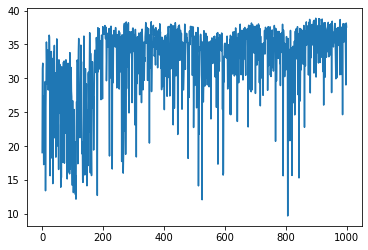

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(qualityPerLine)
plt.show()

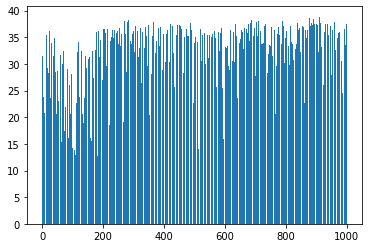

In [95]:
plt.bar(range(len(qualityPerLine)), qualityPerLine)
plt.show()

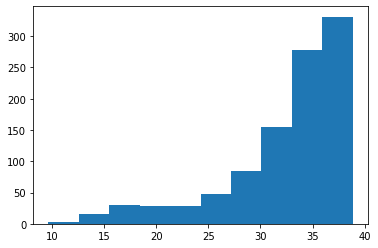

In [97]:
# This is wrong
# Histogram
# Count the quality scores
# TODO: repeat without summing
plt.hist(qualityPerLine)
plt.show()

# Read alignment

In [ ]:
naive exact matching algorithm

In [6]:
p = "word"
t = "There would have been a time for such a word"

print("Length of text", len(t))
print("Length of pattern",len(p))
print(len("There "))
print(len("ould have been a time for such a "))

Length of text 44
Length of pattern 4
6
33
